# prediction task to determine whether a person makes over 50K a yeay

### 2.1 import needing package

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### 2.2 load the data from .csv and merge the train_x and train_y to train

In [2]:
train_x = pd.read_csv('trainFeatures.csv')
train_y_column = ['income']
train_y = pd.read_csv('trainLabels.csv', header=None, names=train_y_column)
train = pd.concat([train_x, train_y], axis=1)
test_x = pd.read_csv('testFeatures.csv')
train_column = list(train.columns.values)
test_column = list(test_x.columns.values)

### 2.3 now we have train|text_x, we explore some information about the df and the attribute

In [3]:
train.head()

,age,workclass,fnlwgt,education,education-num,Marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,24,Private,258298,Assoc-voc,11,Never-married,Tech-support,Not-in-family,White,Male,0,0,45,United-States,0
1,28,Private,208249,Some-college,10,Divorced,Tech-support,Not-in-family,White,Male,0,0,24,United-States,0
2,49,Private,143459,9th,5,Separated,Handlers-cleaners,Own-child,White,Male,0,0,38,United-States,0
3,24,Private,228772,5th-6th,3,Never-married,Machine-op-inspct,Other-relative,White,Female,0,0,40,Mexico,0
4,20,State-gov,41103,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States,0


In [4]:
# 15columns: 7 int column + 8 object column
# 34189 entries
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34189 entries, 0 to 34188
Data columns (total 15 columns):
age               34189 non-null int64
workclass         34189 non-null object
fnlwgt            34189 non-null int64
education         34189 non-null object
education-num     34189 non-null int64
Marital-status    34189 non-null object
occupation        34189 non-null object
relationship      34189 non-null object
race              34189 non-null object
sex               34189 non-null object
capital-gain      34189 non-null int64
capital-loss      34189 non-null int64
hours-per-week    34189 non-null int64
native-country    34189 non-null object
income            34189 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.9+ MB


In [5]:
# 14 columns: 6 int column + 8 object column
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14653 entries, 0 to 14652
Data columns (total 14 columns):
age               14653 non-null int64
workclass         14653 non-null object
fnlwgt            14653 non-null int64
education         14653 non-null object
education-num     14653 non-null int64
Marital-status    14653 non-null object
occupation        14653 non-null object
relationship      14653 non-null object
race              14653 non-null object
sex               14653 non-null object
capital-gain      14653 non-null int64
capital-loss      14653 non-null int64
hours-per-week    14653 non-null int64
native-country    14653 non-null object
dtypes: int64(6), object(8)
memory usage: 1.6+ MB


In [6]:
# now we find that there is no nan value in train and test_x, so we find if there are some strange value in object column
train.workclass.value_counts() # ? 1950

 Private             23702
 Self-emp-not-inc     2713
 Local-gov            2218
 ?                    1950
 State-gov            1393
 Self-emp-inc         1192
 Federal-gov           995
 Without-pay            16
 Never-worked           10
Name: workclass, dtype: int64

In [7]:
train['occupation'].value_counts() # ? 1960

 Prof-specialty       4323
 Exec-managerial      4285
 Craft-repair         4244
 Adm-clerical         3977
 Sales                3852
 Other-service        3407
 Machine-op-inspct    2094
 ?                    1960
 Transport-moving     1672
 Handlers-cleaners    1432
 Farming-fishing      1084
 Tech-support          982
 Protective-serv       700
 Priv-house-serv       168
 Armed-Forces            9
Name: occupation, dtype: int64

In [8]:
train['native-country'].value_counts() # ? 589

 United-States                 30722
 Mexico                          669
 ?                               589
 Philippines                     208
 Germany                         152
 Canada                          129
 Puerto-Rico                     127
 India                           107
 El-Salvador                     100
 Cuba                            100
 England                          89
 South                            82
 China                            79
 Dominican-Republic               75
 Italy                            71
 Jamaica                          70
 Guatemala                        62
 Columbia                         61
 Poland                           60
 Japan                            56
 Portugal                         51
 Vietnam                          50
 Taiwan                           47
 Haiti                            47
 Iran                             41
 Greece                           35
 Nicaragua                        32
 

In [9]:
# we find strang' ?', so we replace it by np.nan
train.replace(' ?', np.nan, inplace=True)
test_x.replace(' ?', np.nan, inplace=True)

In [10]:
# after replace, we explore data continually
train.isnull().sum()

age                  0
workclass         1950
fnlwgt               0
education            0
education-num        0
Marital-status       0
occupation        1960
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     589
income               0
dtype: int64

In [11]:
test_x.isnull().sum()

age                 0
workclass         849
fnlwgt              0
education           0
education-num       0
Marital-status      0
occupation        849
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    268
dtype: int64

### 2.4 now we have find missing value(still don't processing), and we bagin to preprocess the data and make feature engineering

In [12]:
train['income'].value_counts() # 0:26021, 1: 8186

0    26021
1     8168
Name: income, dtype: int64

In [13]:
%matplotlib inline

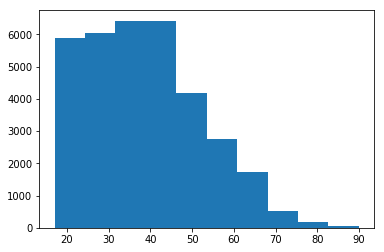

In [14]:
# 2.4.1 'age'(int)
plt.hist(train['age']);

In [15]:
# 2.4.2 'fnlwgt', transform it by log1p
train['fnlwgt'].describe()

count    3.418900e+04
mean     1.897921e+05
std      1.054070e+05
min      1.228500e+04
25%      1.178470e+05
50%      1.784490e+05
75%      2.376240e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [16]:
train['fnlwgt'] = train['fnlwgt'].apply(lambda x: np.log1p(x))
test_x['fnlwgt'] = test_x['fnlwgt'].apply(lambda x: np.log1p(x))
train['fnlwgt'].describe()

count    34189.000000
mean        11.984927
std          0.628397
min          9.416216
25%         11.677151
50%         12.092064
75%         12.378449
max         14.214556
Name: fnlwgt, dtype: float64

In [17]:
# 2.4.3 'education', merge some education bg into 'primary'
train['education'].value_counts()

 HS-grad         11079
 Some-college     7628
 Bachelors        5616
 Masters          1846
 Assoc-voc        1444
 11th             1262
 Assoc-acdm       1105
 10th              979
 7th-8th           662
 Prof-school       585
 9th               529
 12th              460
 Doctorate         414
 5th-6th           353
 1st-4th           173
 Preschool          54
Name: education, dtype: int64

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


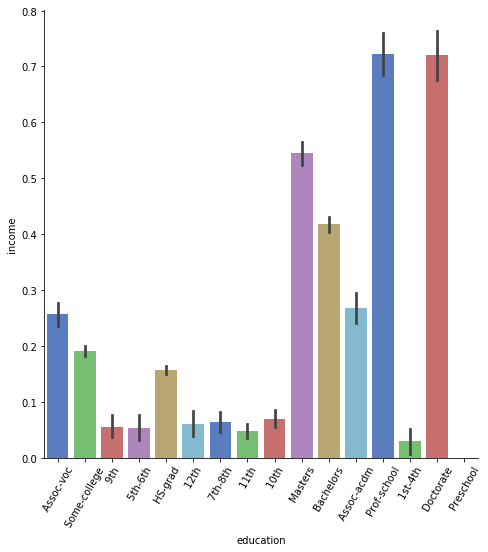

In [18]:
sns.factorplot(x='education', y='income', data=train, kind='bar', size=7, palette='muted')
plt.xticks(rotation=60); # some education bg display the same income tendency

In [19]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'primary'
    else:
        return x

train['education'] = train['education'].apply(primary)
test_x['education'] = test_x['education'].apply(primary)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


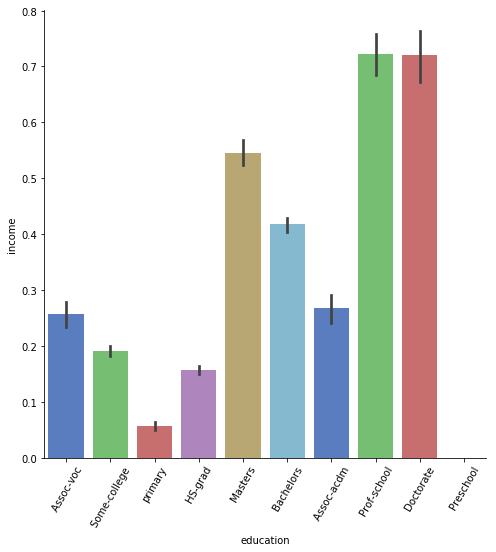

In [20]:
sns.factorplot(x='education', y='income', data=train, kind='bar', size=7, palette='muted')
plt.xticks(rotation=60);

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


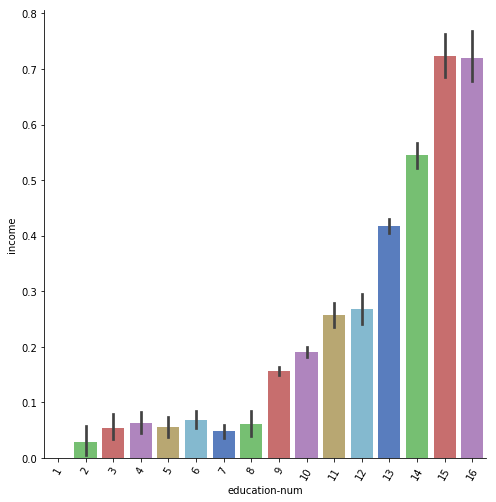

In [21]:
# 2.4.4 'education-num'
sns.factorplot(x='education-num', y='income', data=train, kind='bar', size=7, palette='muted')
plt.xticks(rotation=60); # income increase with the level of educaton-num increase

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


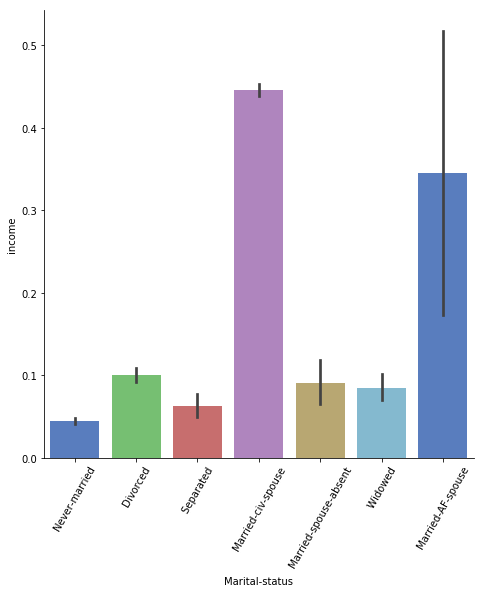

In [22]:
# 2.4.5 'marital-status', merge 2(similar tendency and 1 is small in number) into 1
sns.factorplot(x='Marital-status', y='income', data=train, kind='bar', size=7, palette='muted')
plt.xticks(rotation=60);  # married-af-spouse is similar to married-civ-spouse

In [23]:
train['Marital-status'].value_counts() #  Married-AF-spouse  is so small 

 Married-civ-spouse       15708
 Never-married            11297
 Divorced                  4562
 Widowed                   1096
 Separated                 1065
 Married-spouse-absent      432
 Married-AF-spouse           29
Name: Marital-status, dtype: int64

In [24]:
train['Marital-status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
test_x['Marital-status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


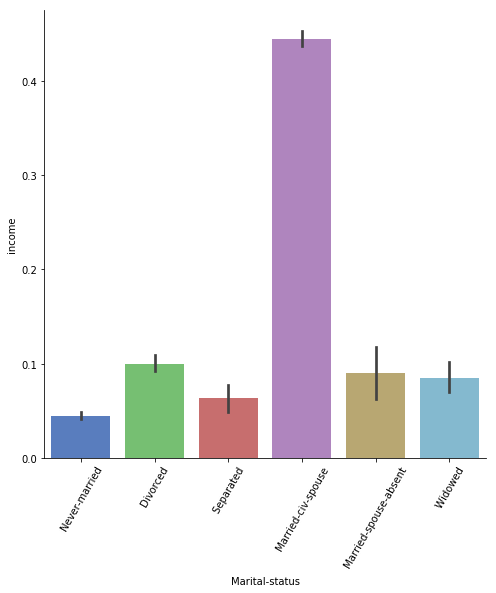

In [25]:
sns.factorplot(x='Marital-status', y='income', data=train, kind='bar', size=7, palette='muted')
plt.xticks(rotation=60);

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


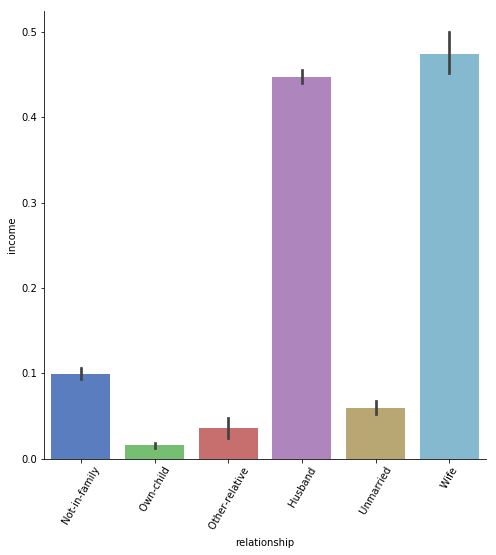

In [26]:
# 2.4.6 'relationship', 
sns.factorplot(x='relationship', y='income', data=train, kind='bar', size=7, palette='muted')
plt.xticks(rotation=60);

In [27]:
train['relationship'].value_counts()# both wife and husband has big number, so we don't merge them

 Husband           13811
 Not-in-family      8750
 Own-child          5334
 Unmarried          3591
 Wife               1648
 Other-relative     1055
Name: relationship, dtype: int64

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


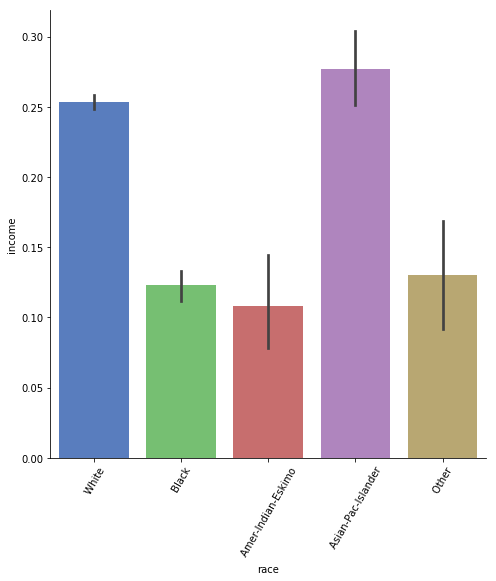

In [28]:
# 2.4.7 'race'
sns.factorplot(x='race', y='income', data=train, kind='bar', size=7, palette='muted')
plt.xticks(rotation=60);

In [29]:
train['race'].value_counts()

 White                 29199
 Black                  3321
 Asian-Pac-Islander     1053
 Amer-Indian-Eskimo      332
 Other                   284
Name: race, dtype: int64

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


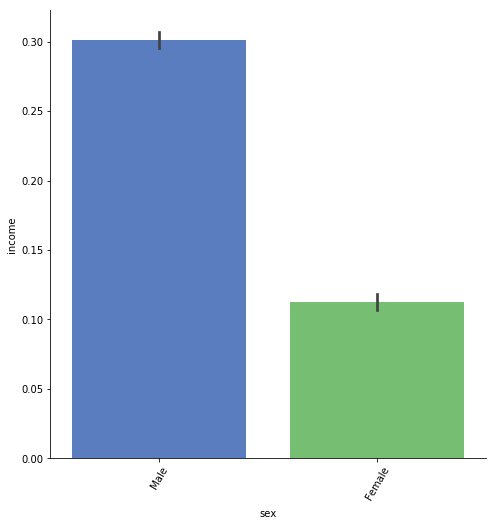

In [30]:
# 2.4.8 'sex'
sns.factorplot(x='sex', y='income', data=train, kind='bar', size=7, palette='muted')
plt.xticks(rotation=60);

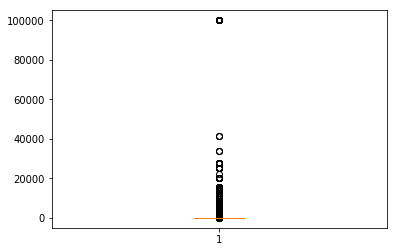

In [31]:
# 2.4.9 'capital gain' # training data and testing data has similar distribution,so we don't preprocess them
plt.boxplot(train['capital-gain']);

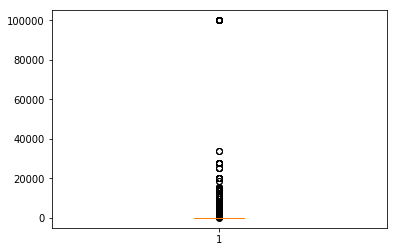

In [32]:
plt.boxplot(test_x['capital-gain']);

In [33]:
train['capital-gain'].describe()

count    34189.000000
mean      1073.523765
std       7451.485819
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [34]:
test_x['capital-gain'].describe()

count    14653.000000
mean      1092.002798
std       7453.501351
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [35]:
# 2.4.10 'capital loss' : training data and testing data has similar distribution, so we don't preprocess
train['capital-loss'].describe()

count    34189.000000
mean        87.645442
std        403.366678
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

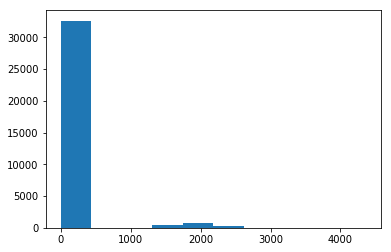

In [36]:
plt.hist(train['capital-loss']);

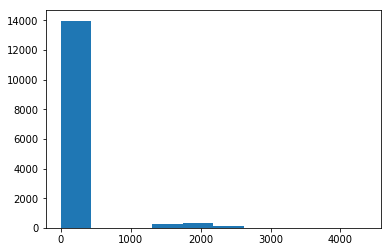

In [37]:
plt.hist(test_x['capital-loss']);

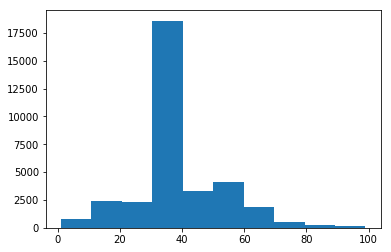

In [38]:
# 2.4.11 'hours-per-week': training data and testing data has similar distribution, so we don't preprocess
plt.hist(train['hours-per-week']);

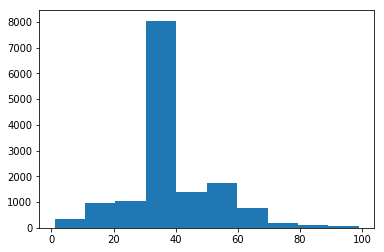

In [39]:
plt.hist(test_x['hours-per-week']);

In [40]:
# 2.4.12 'native-country': fill missing value by US, and merge them by location
train['native-country'].value_counts()

 United-States                 30722
 Mexico                          669
 Philippines                     208
 Germany                         152
 Canada                          129
 Puerto-Rico                     127
 India                           107
 Cuba                            100
 El-Salvador                     100
 England                          89
 South                            82
 China                            79
 Dominican-Republic               75
 Italy                            71
 Jamaica                          70
 Guatemala                        62
 Columbia                         61
 Poland                           60
 Japan                            56
 Portugal                         51
 Vietnam                          50
 Taiwan                           47
 Haiti                            47
 Iran                             41
 Greece                           35
 Nicaragua                        32
 France                           30
 

In [41]:
train['native-country'].fillna(' United-States', inplace=True)
test_x['native-country'].fillna(' United-States', inplace=True)

In [42]:
train['native-country'].value_counts()

 United-States                 31311
 Mexico                          669
 Philippines                     208
 Germany                         152
 Canada                          129
 Puerto-Rico                     127
 India                           107
 Cuba                            100
 El-Salvador                     100
 England                          89
 South                            82
 China                            79
 Dominican-Republic               75
 Italy                            71
 Jamaica                          70
 Guatemala                        62
 Columbia                         61
 Poland                           60
 Japan                            56
 Portugal                         51
 Vietnam                          50
 Taiwan                           47
 Haiti                            47
 Iran                             41
 Greece                           35
 Nicaragua                        32
 France                           30
 

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


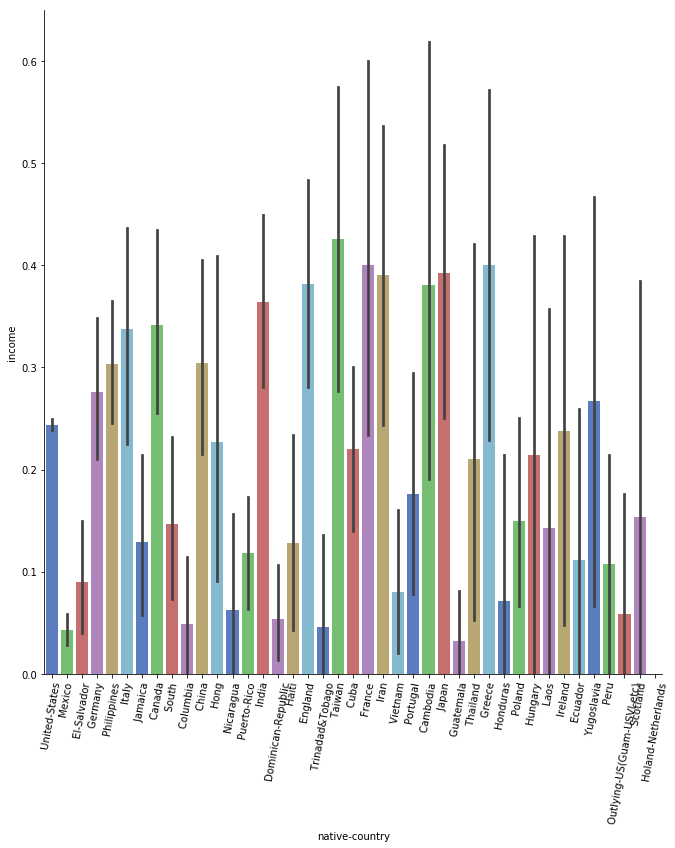

In [43]:
sns.factorplot(x="native-country",y="income",data=train,kind="bar", size = 10, palette = "muted")
plt.xticks(rotation=80);

In [44]:
def native(country):
    if country in [' United-States', ' Cuba']:
        return 'US'
    elif country in [' England', ' Germany', ' Canada', ' Italy', ' France', ' Greece', ' Philippines']:
        return 'Western'
    elif country in [' Mexico', ' Puerto-Rico', ' Honduras', ' Jamaica', ' Columbia', ' Laos', ' Portugal', ' Haiti',
                     ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Peru', 
                     ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Vietnam', ' Holand-Netherlands' ]:
        return 'Poor' # no offence
    elif country in [' India', ' Iran', ' Cambodia', ' Taiwan', ' Japan', ' Yugoslavia', ' China', ' Hong']:
        return 'Eastern'
    elif country in [' South', ' Poland', ' Ireland', ' Hungary', ' Scotland', ' Thailand', ' Ecuador']:
        return 'Poland team'
    
    else: 
        return country 
    

train['native-country'] = train['native-country'].apply(native)
test_x['native-country'] = test_x['native-country'].apply(native)

In [45]:
train['native-country'].value_counts()

US             31411
Poor            1440
Western          714
Eastern          388
Poland team      236
Name: native-country, dtype: int64

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


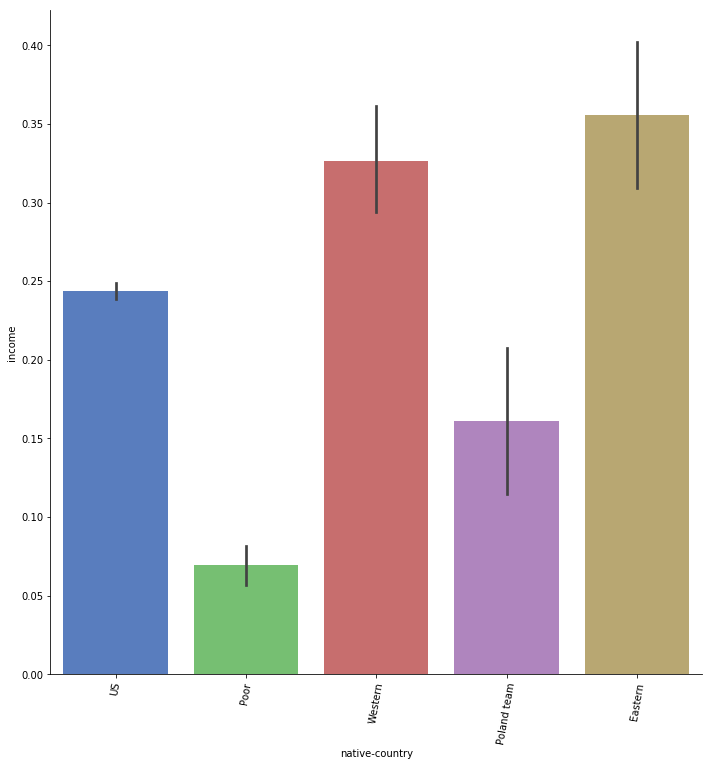

In [46]:
sns.factorplot(x="native-country",y="income",data=train,kind="bar", size = 10, palette = "muted")
plt.xticks(rotation=80);

In [47]:
train.isnull().sum()

age                  0
workclass         1950
fnlwgt               0
education            0
education-num        0
Marital-status       0
occupation        1960
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income               0
dtype: int64

In [48]:
# 2.4.13 'workclass': fill missing value by mode
train['workclass'].value_counts()

 Private             23702
 Self-emp-not-inc     2713
 Local-gov            2218
 State-gov            1393
 Self-emp-inc         1192
 Federal-gov           995
 Without-pay            16
 Never-worked           10
Name: workclass, dtype: int64

In [49]:
train['workclass'].fillna(' Private', inplace=True)
test_x['workclass'].fillna(' Private', inplace=True)
train['workclass'].value_counts()

 Private             25652
 Self-emp-not-inc     2713
 Local-gov            2218
 State-gov            1393
 Self-emp-inc         1192
 Federal-gov           995
 Without-pay            16
 Never-worked           10
Name: workclass, dtype: int64

In [50]:
test_x['workclass'].value_counts()

 Private             11053
 Self-emp-not-inc     1149
 Local-gov             918
 State-gov             588
 Self-emp-inc          503
 Federal-gov           437
 Without-pay             5
Name: workclass, dtype: int64

In [51]:
train['workclass'].replace(' Never-worked', ' Without-pay', inplace=True)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


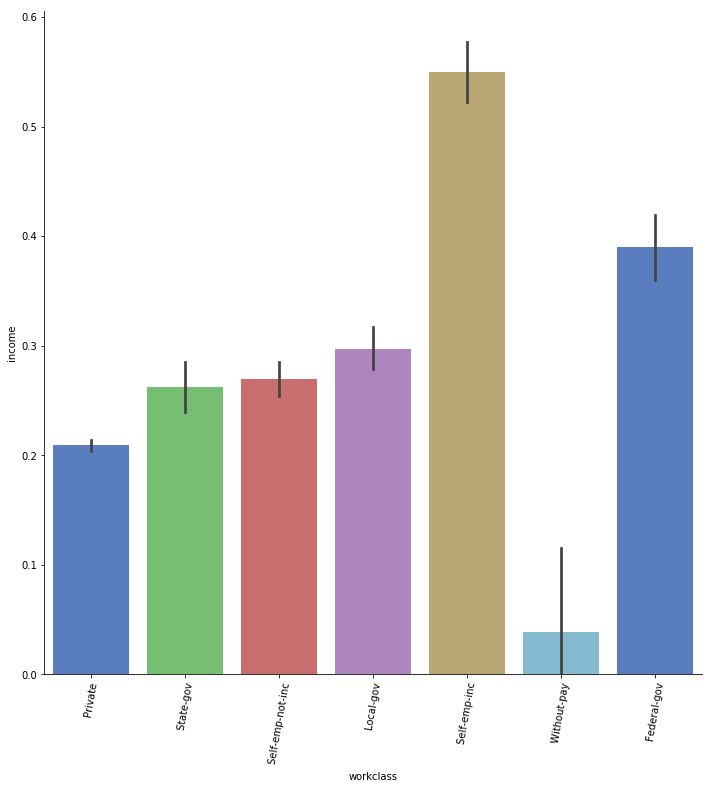

In [52]:
sns.factorplot(x="workclass",y="income",data=train,kind="bar", size = 10, palette = "muted")
plt.xticks(rotation=80);

In [53]:
# 2.4.14 'occupation' fill missing value by 0
train['occupation'].fillna(' 0', inplace=True)
test_x['occupation'].fillna(' 0', inplace=True)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


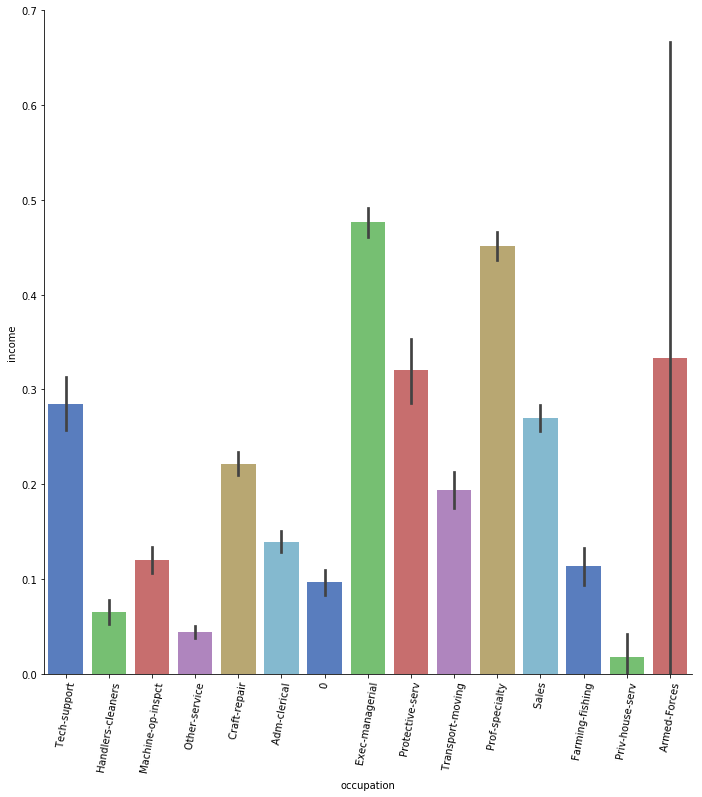

In [54]:
sns.factorplot(x="occupation",y="income",data=train,kind="bar", size = 10, palette = "muted")
plt.xticks(rotation=80);

In [55]:
train['occupation'].value_counts()

 Prof-specialty       4323
 Exec-managerial      4285
 Craft-repair         4244
 Adm-clerical         3977
 Sales                3852
 Other-service        3407
 Machine-op-inspct    2094
 0                    1960
 Transport-moving     1672
 Handlers-cleaners    1432
 Farming-fishing      1084
 Tech-support          982
 Protective-serv       700
 Priv-house-serv       168
 Armed-Forces            9
Name: occupation, dtype: int64

In [56]:
train['occupation'].replace(' Armed-Forces', ' Protective-serv', inplace=True)
test_x['occupation'].replace(' Armed-Forces', ' Protective-serv', inplace=True)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


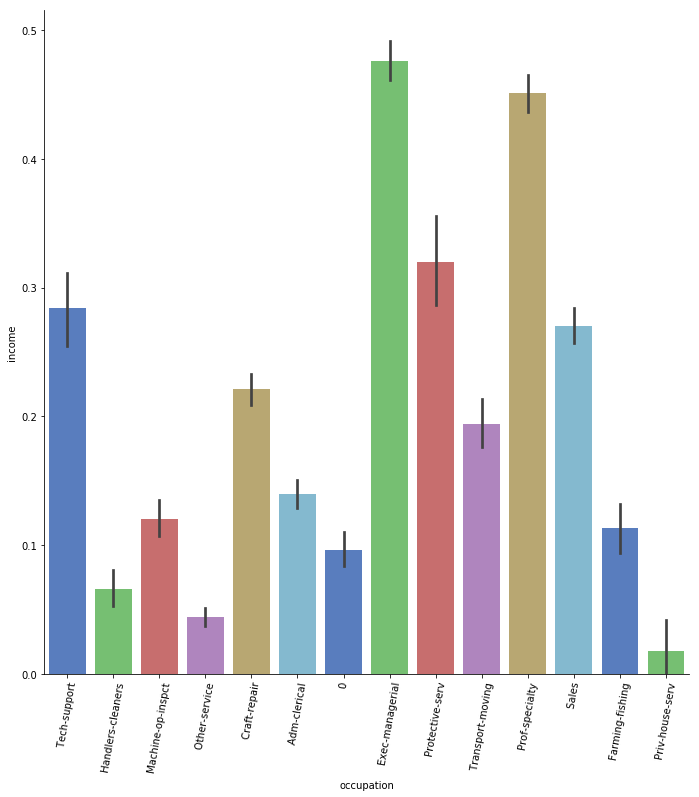

In [57]:
sns.factorplot(x="occupation",y="income",data=train,kind="bar", size = 10, palette = "muted")
plt.xticks(rotation=80);

In [58]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
Marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [59]:
test_x.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
Marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

### 2.5 split training data to training and validation data

In [60]:
train.dtypes

age                 int64
workclass          object
fnlwgt            float64
education          object
education-num       int64
Marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object

In [61]:
# 2.5.1 list of columns with dtype: object
categorical_features = train.select_dtypes(include=['object']).axes[1]
for col in categorical_features:
    print(col, train[col].nunique())

workclass 7
education 10
Marital-status 6
occupation 14
relationship 6
race 5
sex 2
native-country 5


In [62]:
# 2.5.2 one-hot encoder
for col in categorical_features:
    train = pd.concat([train, pd.get_dummies(train[col], prefix=col, prefix_sep=':')], axis=1)
    train.drop(col, axis=1, inplace=True)

In [63]:
train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass: Federal-gov,workclass: Local-gov,workclass: Private,...,race: Black,race: Other,race: White,sex: Female,sex: Male,native-country:Eastern,native-country:Poland team,native-country:Poor,native-country:US,native-country:Western
0,24,12.461873,11,0,0,45,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
1,28,12.246495,10,0,0,24,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,49,11.873812,5,0,0,38,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,24,12.340486,3,0,0,40,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4,20,10.623861,10,0,0,20,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [64]:
categorical_features = test_x.select_dtypes(include=['object']).axes[1]
for col in categorical_features:
    print(col, test_x[col].nunique())

workclass 7
education 10
Marital-status 6
occupation 14
relationship 6
race 5
sex 2
native-country 5


In [65]:
train.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass: Federal-gov',
       'workclass: Local-gov', 'workclass: Private', 'workclass: Self-emp-inc',
       'workclass: Self-emp-not-inc', 'workclass: State-gov',
       'workclass: Without-pay', 'education: Assoc-acdm',
       'education: Assoc-voc', 'education: Bachelors', 'education: Doctorate',
       'education: HS-grad', 'education: Masters', 'education: Preschool',
       'education: Prof-school', 'education: Some-college',
       'education:primary', 'Marital-status: Divorced',
       'Marital-status: Married-civ-spouse',
       'Marital-status: Married-spouse-absent',
       'Marital-status: Never-married', 'Marital-status: Separated',
       'Marital-status: Widowed', 'occupation: 0', 'occupation: Adm-clerical',
       'occupation: Craft-repair', 'occupation: Exec-managerial',
       'occupation: Farming-fishing', 'occupation: Handlers-cleaners',
       'occupation

In [66]:
# 2.5.3 apply the same way(one-hot encoder) to test_x
for col in categorical_features:
    test_x = pd.concat([test_x, pd.get_dummies(test_x[col], prefix=col, prefix_sep=':')], axis=1)
    test_x.drop(col, axis=1, inplace=True)

In [67]:
test_x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass: Federal-gov,workclass: Local-gov,workclass: Private,workclass: Self-emp-inc,...,race: Black,race: Other,race: White,sex: Female,sex: Male,native-country:Eastern,native-country:Poland team,native-country:Poor,native-country:US,native-country:Western
0,51,11.925035,9,0,0,40,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,41,12.980777,11,4386,0,60,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,41,12.117296,9,0,0,40,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,59,12.207656,9,0,0,40,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
4,53,11.257556,10,0,0,60,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [68]:
test_x.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass: Federal-gov', 'workclass: Local-gov',
       'workclass: Private', 'workclass: Self-emp-inc',
       'workclass: Self-emp-not-inc', 'workclass: State-gov',
       'workclass: Without-pay', 'education: Assoc-acdm',
       'education: Assoc-voc', 'education: Bachelors', 'education: Doctorate',
       'education: HS-grad', 'education: Masters', 'education: Preschool',
       'education: Prof-school', 'education: Some-college',
       'education:primary', 'Marital-status: Divorced',
       'Marital-status: Married-civ-spouse',
       'Marital-status: Married-spouse-absent',
       'Marital-status: Never-married', 'Marital-status: Separated',
       'Marital-status: Widowed', 'occupation: 0', 'occupation: Adm-clerical',
       'occupation: Craft-repair', 'occupation: Exec-managerial',
       'occupation: Farming-fishing', 'occupation: Handlers-cleaners',
       'occupation: Machine-

In [69]:
# 2.5.4 scaler the X and split the training data to training data and validation data 
x = train.drop('income', axis=1)
y = train['income']
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
test_x = scaler.transform(test_x)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ttrain, Ttest = train_test_split(x, y, test_size=0.2, random_state=42)

### 2.6 after prepare the data, we begin to use different model to compute the accuracy

#### 2.6.1 logistic regression

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Xtrain, Ttrain)
print('training accuracy: ', model.score(Xtrain, Ttrain))
print('validation accuracy: ', model.score(Xtest, Ttest))

training accuracy:  0.8549961610178787
validation accuracy:  0.8490786779760163


#### 2.6.2 GBRT

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
import matplotlib.pylab as plt
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(Xtrain, Ttrain)
y_pred = gbm0.predict(Xtrain)
y_predprob = gbm0.predict_proba(Xtrain)[:,1]
print('Accuracy: %.4g' % metrics.accuracy_score(Ttrain, y_pred))
print('AUC Score(train): %f' % metrics.roc_auc_score(Ttrain, y_predprob))

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Accuracy: 0.8712
AUC Score(train): 0.925578


In [76]:
gbm2 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=12, min_samples_leaf =30, 
               min_samples_split =1800, max_features=38, subsample=1.0, random_state=10)
gbm2.fit(Xtrain, Ttrain)
y_pred = gbm2.predict(Xtrain)
y_predprob = gbm2.predict_proba(Xtrain)[:,1]
print('traing accuracy: %.4g' % metrics.accuracy_score(Ttrain, y_pred))
print('AUC Score(train): %f' % metrics.roc_auc_score(Ttrain, y_predprob))
test_pred = gbm2.predict(Xtest)
print ("validation accuracy : %.4g" % metrics.accuracy_score(Ttest, test_pred))

traing accuracy: 0.888
AUC Score(train): 0.945364
validation accuracy : 0.8716


In [85]:
test_prediction = gbm2.predict(test_x)

## 2.7 output the prediction result

In [90]:
import pandas as pd
test_prediction_series = pd.Series(test_prediction)
test_prediction_series.to_csv(path='E:/python/5002DM/assign2/A2_mguoaf_20527755_prediction.csv', index=False)